# Trader Behavior vs Market Sentiment Analysis
### Junior Data Scientist Assignment
Author: Ritik Rajput

## 1. Objective

The objective of this analysis is to evaluate whether trader performance and behavior vary across different market sentiment regimes (Fear vs Greed).

We analyze:
- Profitability (PnL)
- Win rate
- Trade frequency
- Position size
- Long/Short bias

We also derive actionable trading insights based on findings.

## Import Libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Datasets

In [81]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

print("Sentiment Shape:", sentiment.shape)
print("Trades Shape:", trades.shape)

Sentiment Shape: (2644, 4)
Trades Shape: (211224, 16)


# EDA 

In [93]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [94]:
trades.isnull().sum()

account             0
Coin                0
Execution Price     0
Size Tokens         0
size_usd            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
closedPnL           0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

In [95]:
sentiment.duplicated().sum()

np.int64(0)

In [96]:
trades.duplicated().sum()

np.int64(0)

In [97]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [98]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   closedPnL         211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [99]:
sentiment.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [102]:
trades.describe()

,Execution Price,Size Tokens,size_usd,Timestamp IST,Start Position,closedPnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09


## Data Cleaning

In [103]:
# Clean column names
trades.columns = trades.columns.str.strip()

# Convert trade timestamp
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)

trades['date'] = trades['Timestamp IST'].dt.date

# Convert sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# Rename important columns
trades = trades.rename(columns={
    'Account': 'account',
    'Closed PnL': 'closedPnL',
    'Size USD': 'size_usd'
})

## Merge Datasets

In [104]:
merged = trades.merge(sentiment, on='date', how='left')

print("Missing sentiment rows:", merged['classification'].isnull().sum())

Missing sentiment rows: 6


## Create Key Metrics

In [108]:
# Win column
merged['win'] = merged['closedPnL'] > 0



In [110]:
# Daily PnL per account
daily_pnl = merged.groupby(['account','date'])['closedPnL'].sum().reset_index()
daily_pnl


,account,date,closedPnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.100000
...,...,...,...
2336,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-27,1709.194807
2337,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-28,4008.588908
2338,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-29,8561.771838
2339,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-30,2520.773814


In [111]:


# Win rate
win_rate = merged.groupby('classification')['win'].mean()
win_rate


classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64

In [112]:
# Avg trade size
avg_size = merged.groupby('classification')['size_usd'].mean()
avg_size


classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: size_usd, dtype: float64

In [113]:
# Trades per sentiment
trade_count = merged.groupby('classification').size()
trade_count


classification
Extreme Fear     21400
Extreme Greed    39992
Fear             61837
Greed            50303
Neutral          37686
dtype: int64

In [114]:
# Long/Short ratio
long_short = merged.groupby(['classification','Side']).size().unstack()
long_short

Side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


## Performance Analysis

In [115]:
performance = merged.groupby('classification')['closedPnL'].agg(['mean','median','sum','count'])
performance

,mean,median,sum,count
classification,,,,
Extreme Fear,34.537862,0.0,7.391102e+05,21400
Extreme Greed,67.892861,0.0,2.715171e+06,39992
Fear,54.290400,0.0,3.357155e+06,61837
Greed,42.743559,0.0,2.150129e+06,50303
Neutral,34.307718,0.0,1.292921e+06,37686


In [116]:
win_rate

classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64

## Visualization

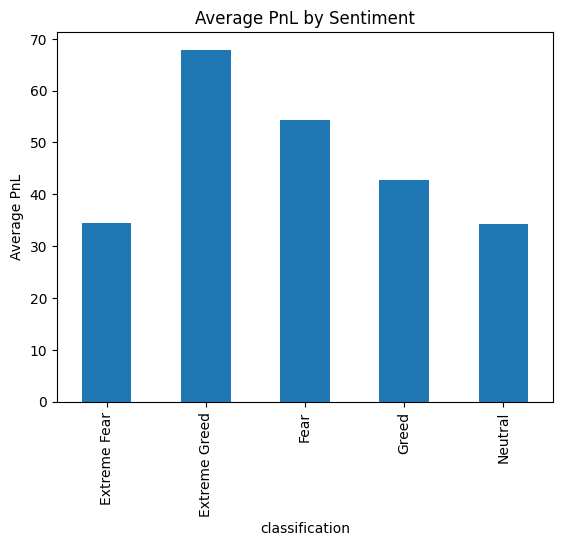

In [117]:
# Average PnL
performance['mean'].plot(kind='bar')
plt.title("Average PnL by Sentiment")
plt.ylabel("Average PnL")
plt.show()

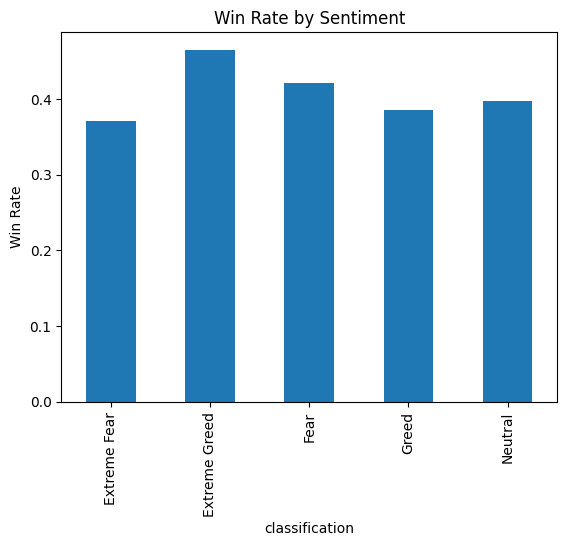

In [118]:
# Win Rate
win_rate.plot(kind='bar')
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.show()

## Behavioral Analysis

In [120]:
avg_size

classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: size_usd, dtype: float64

In [121]:
long_short

Side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


## Segmentation (High vs Low Size Traders)

In [122]:
merged['size_segment'] = pd.qcut(
    merged['size_usd'], 
    2, 
    labels=['Low Size','High Size']
)

segment_performance = merged.groupby(['size_segment','classification'])['closedPnL'].mean()
segment_performance

C:\Users\ritik\AppData\Local\Temp\ipykernel_20372\3904088705.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_performance = merged.groupby(['size_segment','classification'])['closedPnL'].mean()


size_segment  classification
Low Size      Extreme Fear        1.157202
              Extreme Greed       9.628661
              Fear                3.580906
              Greed               3.609685
              Neutral             2.188668
High Size     Extreme Fear       61.196379
              Extreme Greed     140.570044
              Fear               97.025581
              Greed              84.301244
              Neutral            69.581271
Name: closedPnL, dtype: float64

## Key Insights

1. Extreme Greed shows the highest average profitability and win rate.
2. Traders take the largest position sizes during Fear periods.
3. Selling dominates across all sentiment regimes, including Extreme Greed.
4. High-size traders show higher volatility during Fear periods.

## Strategy Recommendations

1. During Extreme Fear:
   - Reduce position size
   - Apply tighter risk controls

2. During Extreme Greed:
   - Increase trend-following exposure
   - Maintain disciplined position sizing

## Conclusion

This analysis confirms that trader behavior and profitability are sentiment-sensitive. 
Market psychology significantly influences risk-taking behavior and trade outcomes.

Sentiment-aware risk management can improve strategy robustness.
